# The Sequential model API

In [1]:
import tensorflow as tf
print(tf.__version__)

2025-11-26 19:57:25.718939: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-26 19:57:25.770252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-26 19:57:28.276275: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.20.0


 ## Coding tutorials
 #### [01. Building a Sequential model](#coding_tutorial_1)
 #### [02. Convolutional and pooling layers](#coding_tutorial_2)
 #### 03. Weight initializers
 #### [04. The compile method](#coding_tutorial_3)
 #### 05. Metrics
 #### [06. The fit method](#coding_tutorial_4)
 #### [07. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
# 01 Building a Sequential model
In this lab you will build a Sequential model using Dense layers.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model
model = Sequential([
  Flatten(input_shape=(28, 28), name='1D image 28x28'),
  Dense(16, activation='relu', name='h1 relu 16'),
  Dense(16, activation='tanh', name='h2 tanh 16'),
  Dense(16, activation='sigmoid', name='h3 sigmoid 16'),
  Dense(8, activation='softmax', name='classify 8')
])

In [ ]:
# To calculate the number of parameters in each layer
input_size = 28 * 28
parameters_h1 = (input_size)*(16+1) # +1 for bias
parameters_h2 = (16 * (16 + 1))  # +1 for bias
parameters_h3 = (16 * (16 + 1))  # +1 for bias'
parameters_output = (16 * (8 + 1))  # +1 for bias
total_parameters = parameters_h1 + parameters_h2 + parameters_h3 + parameters_output
print(f'Total parameters: {total_parameters}')

In [22]:
# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1D image 8x8 (Flatten)          │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first hidden layer (Dense)      │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classify 8 (Dense)              │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,720 (6.72 KB)

 Trainable params: 1,720 (6.72 KB)

 Non-trainable params: 0 (0.00 B)

***
<a id="coding_tutorial_2"></a>
# 02 Convolutional and pooling layers

In this lab you will build a Sequential convolutional neural network model using Conv2D and MaxPooling2D layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model
model = Sequential([
    # Parameters, Filter Size, Kernel Size, Activation Function, Input Shape, Layer Name 
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3), name='conv layer 1'), # 28 x 28 x 3 because of RGB 
    # The output shape will be calculated as (W−F+1, H−F+1, Number of Filters), in this case (28-3+1, 28-3+1, 16)
    # The filters are slid over the input image, performing element-wise multiplications and summing them up to produce feature maps 
    # after the first conv layer, the output shape will be (26, 26, 16) because (28-3+1, 28-3+1, 16)
    
    MaxPooling2D((2, 2), name='max pool 1'), # The pooling layer reduces each dimension by half because of (2,2) pool size
    # after the first max pooling layer, the output shape will be (13, 13, 16)

    Conv2D(32, (3, 3), activation='relu', name='conv layer 2', padding='same'),
    # here we use padding='same' to keep the output shape the same as input shape
    # after the second conv layer, the output shape will be (13, 13, 32) because of padding='same'

    # Other types of pooling layers include AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
    AveragePooling2D((2, 2), name='avg pool 1'),
    # after the average pooling layer, the output shape will be (6, 6, 32)

    Flatten(),
    
    # For this flattened layer, the input size will be 6*6*32 = 1152
    Dense(64, activation='relu', name='fully connected 1'), # And the output size can be chosen arbitrarily, in this case 64
    
    Dense(10, activation='softmax', name='output layer')
])


In [ ]:
# Print the model summary
model.summary()


***
<a id="coding_tutorial_3"></a>
# 04 The compile method

In this lab you will learn how to use the `compile` method to configure the learning process of a Sequential model.

#### Compile the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define the model optimizer, loss function and metrics
model = Sequential()  # Create a new Sequential model instance
model.add(Dense(16, activation='relu', input_shape=(28*28,)))  # Add first dense layer with 16 units, ReLU activation, and input shape for flattened 28x28 images
model.add(Dense(16, activation='tanh'))  # Add second dense layer with 16 units and tanh activation
model.add(Dense(8, activation='softmax'))  # Add output dense layer with 8 units and softmax activation for classification

model.compile(optimizer='adam',  # Compile the model with Adam optimizer
                loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy loss for integer labels
                metrics=['accuracy'])  # Track accuracy as a metric
# Print the model summary
model.summary()  # Display the model architecture and parameters

In [ ]:
# Other way to define the model optimizer, loss function and metrics
model = Sequential()  # Create a new Sequential model instance

model.add(Dense(16, activation='relu', input_shape=(28*28,)))  # Add first dense layer with 16 units, ReLU activation, and input shape for flattened 28x28 images
model.add(Dense(16, activation='tanh'))  # Add second dense layer with 16 units and tanh activation
model.add(Dense(8, activation='softmax'))  # Add output dense layer with 8 units and softmax activation for classification

model.compile(  # Compile the model with specified optimizer, loss, and metrics
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),  # Use Adam optimizer with custom learning rate and beta parameters
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use sparse categorical crossentropy loss (expects probabilities from softmax)
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),  # Track sparse categorical accuracy
             tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top-3-accuracy')])  # Track top-3 categorical accuracy

In [ ]:
# Other way to define the model optimizer, loss function and metrics
model = Sequential()  # Create a new Sequential model instance

model.add(Dense(16, activation='relu', input_shape=(28*28,)))  # Add first dense layer with 16 units, ReLU activation, and input shape for flattened 28x28 images
model.add(Dense(16, activation='tanh'))  # Add second dense layer with 16 units and tanh activation
model.add(Dense(8, activation='softmax'))  # Add output dense layer with 8 units and softmax activation for classification

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)  # Define Adam optimizer with custom parameters
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  # Define sparse categorical crossentropy loss function
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')  # Define sparse categorical accuracy metric
top3_metric = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top-3-accuracy')  # Define top-3 categorical accuracy metric
metrics = [accuracy_metric, top3_metric]  # Combine metrics into a list

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)  # Compile the model with the defined optimizer, loss, and metrics

In [ ]:
# print the model attributes
print(f'Optimizer: {model.optimizer}'
      f'\nLoss Function: {model.loss}'
      f'\nMetrics: {model.metrics}'
      f'\nLearning Rate: {model.optimizer.learning_rate.numpy()}')

In [ ]:
# Print the model summary
model.summary()  # Display the model architecture and parameters

***
<a id="coding_tutorial_4"></a>
# 06 The fit method

In [3]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [1]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2025-11-25 23:49:26.411356: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-25 23:49:26.452259: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 23:49:27.529927: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


#### Load the data

In [4]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
# Build the Sequential convolutional neural network model
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,410 (40.66 KB)

 Trainable params: 10,410 (40.66 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
mae = tf.keras.metrics.MeanAbsoluteError(name='mae')

# Use only classification-appropriate metrics here. Remove MeanAbsoluteError (regression metric)
# which causes a shape mismatch: labels are shape (batch,) while predictions are (batch, num_classes).
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc])

In [32]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [33]:
# Define the labels. In the Fashion-MNIST dataset, there are 10 classes of clothing items from 0 to 9. (we use sparse labels)
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels)

[9 0 0 ... 3 0 5]


In [34]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

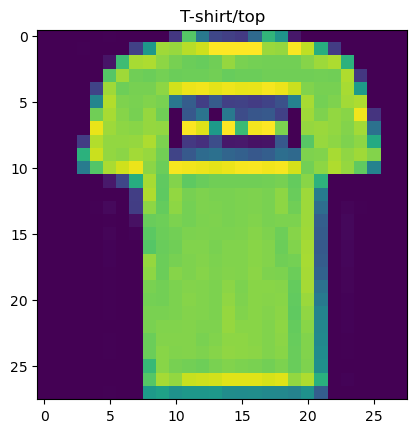

In [35]:
# Display one of the images
image_index = 1
img = train_images[image_index, :, : ]
plt.imshow(img)
plt.title(labels[train_labels[image_index]])
plt.show()

#### Fit the model

In [45]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10, batch_size=512, verbose=1)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7628 - loss: 0.6698
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7628 - loss: 0.6698
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7640 - loss: 0.6671
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7640 - loss: 0.6671
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7648 - loss: 0.6642
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7648 - loss: 0.6642
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7664 - loss: 0.6616
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7664 - loss: 0.6616
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.6586
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.6586
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7681 - loss: 0.6559
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

#### Plot training history

In [58]:
# Load the history into a pandas Datafram e
history_df = pd.DataFrame(history.history)
history_df.tail()

,accuracy,loss
5,0.768133,0.655944
6,0.769617,0.652875
7,0.770583,0.650020
8,0.771650,0.646939
9,0.772250,0.643986


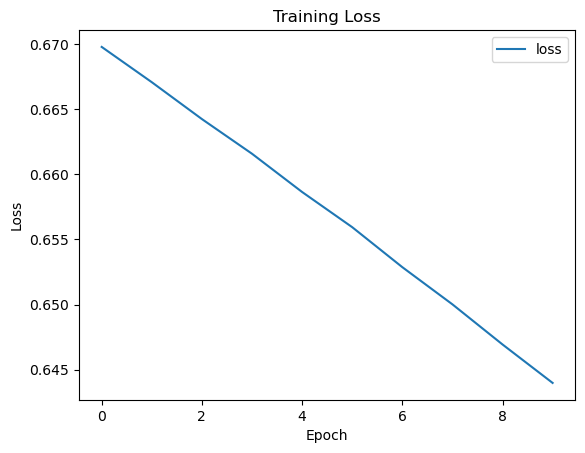

In [47]:
# Make a plot for the loss
history_df[['loss']].plot()
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

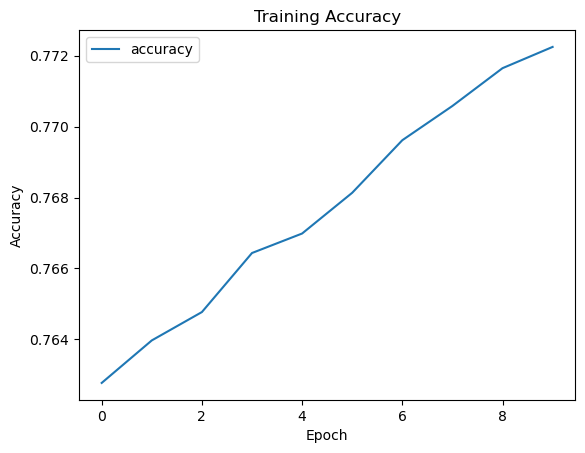

In [48]:
# Make a plot for the accuracy
history_df[['accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

***
<a id="coding_tutorial_5"></a>
# 07 The evaluate and predict methods

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [54]:
test_images.shape

(10000, 28, 28)

In [55]:
test_images[..., np.newaxis].shape

(10000, 28, 28, 1)

In [56]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7664 - loss: 0.6624
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7664 - loss: 0.6624


In [57]:
test_loss, test_acc

(0.6624312400817871, 0.7663999795913696)

#### Make predictions from the model

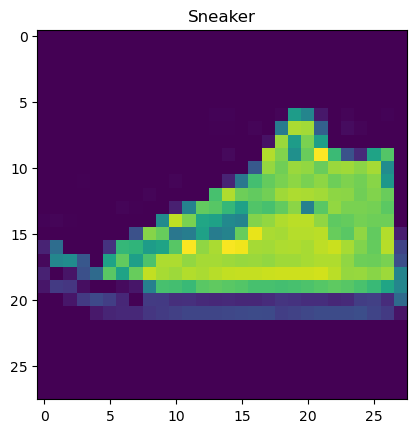

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model predictions: Sneaker
Model predictions: Sneaker


array([[1.3198257e-05, 4.5227640e-07, 1.6541296e-04, 3.6588022e-05,
        2.5404801e-04, 5.3298496e-02, 1.3157621e-04, 7.6596665e-01,
        2.3380443e-03, 1.7779556e-01]], dtype=float32)

In [69]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.title(labels[test_labels[random_inx]])
plt.show()

# Get the model predictions
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f'Model predictions: {labels[np.argmax(predictions)]}')
predictions